# Homework 4 (HW4)

Deadline: December 1st. Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW 4/1)

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 500 datapoints**.
* Use the data-generating function provided below on a chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hint*: To check that you are proceeding correctly make sure that your scatterplot does look like a polynomial with added noise.)

/Users/nixilis/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


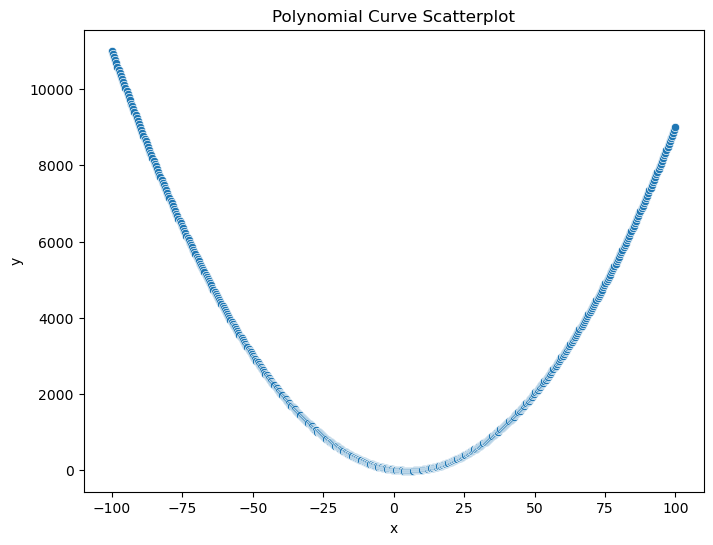

In [50]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.model_selection import train_test_split 


def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y

x = np.linspace(-100, 100, 500) 
y = curve_generator(x, 1.0) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Curve Scatterplot')
plt.show()

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test)) 

Number of training samples: 335
Number of test samples: 165


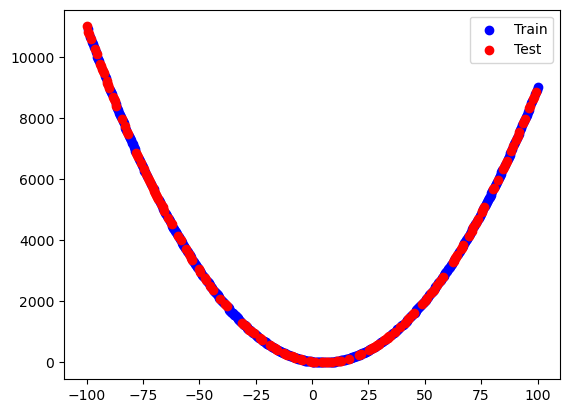

In [52]:
plt.scatter(x_train, y_train, color='blue', label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.legend()
plt.show()

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in one figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* <span style="color:red">What can you observe? Interpret the plots!</span>

In [53]:
from sklearn.metrics import mean_squared_error

def polynomialreg(degree): 

    train_errors = [] #initialize arrays 
    test_errors = []

    for x in range((degree+1)): #analysis between 0 and degree value 
        c = np.polyfit(x_train, y_train, x)
        model = np.poly1d(c) #create 1 dimensional polynomial object 
    
        trainp = model(x_train)
        testp = model(x_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, trainp)) #mean squared error calculation 
        test_rmse = np.sqrt(mean_squared_error(y_test, testp))
    
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

    plt.plot(range((degree+1)), train_errors, label='Train')
    plt.plot(range((degree+1)), test_errors, label='Test')
    plt.xlabel('Degrees')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

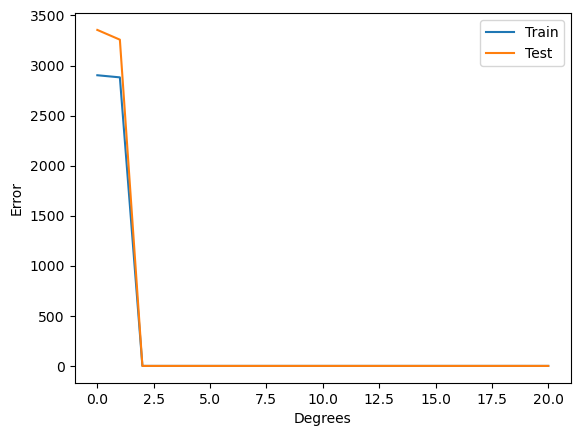

In [54]:
polynomialreg(20)

**c)** How does the modification of the size of the training set affect the performance of the model? 
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * <span style="color:red">What can you observe? Interpret the plots!</span>

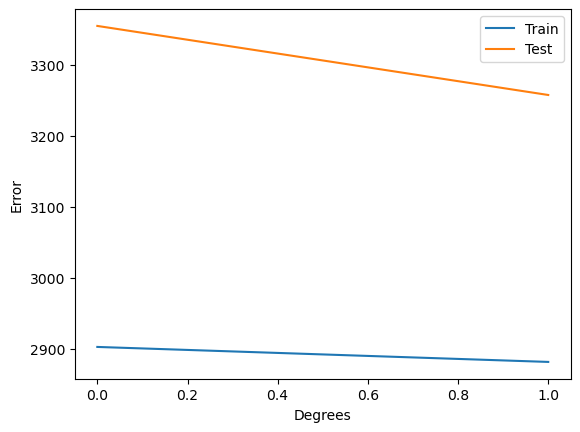

In [55]:
polynomialreg(1)

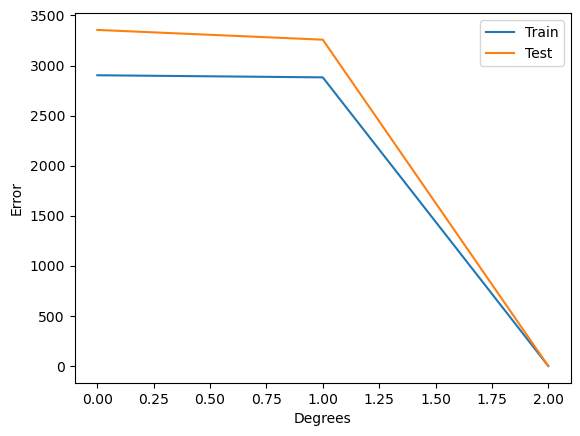

In [56]:
polynomialreg(2)

---

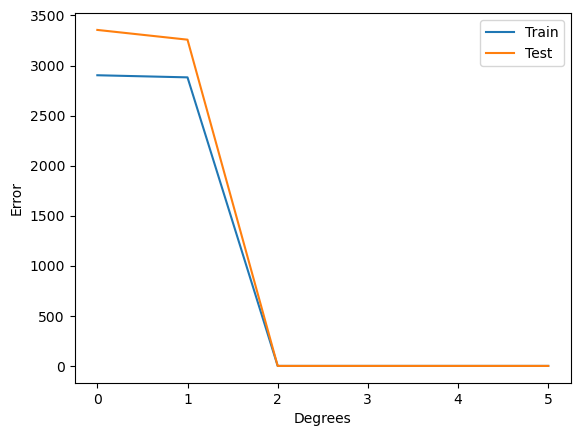

In [57]:
polynomialreg(5)

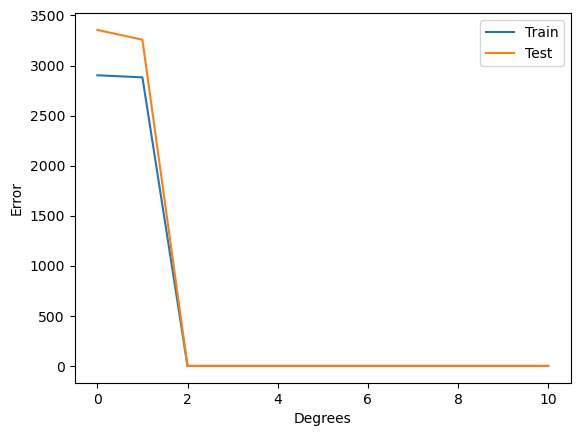

In [58]:
polynomialreg(10)

/Users/nixilis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


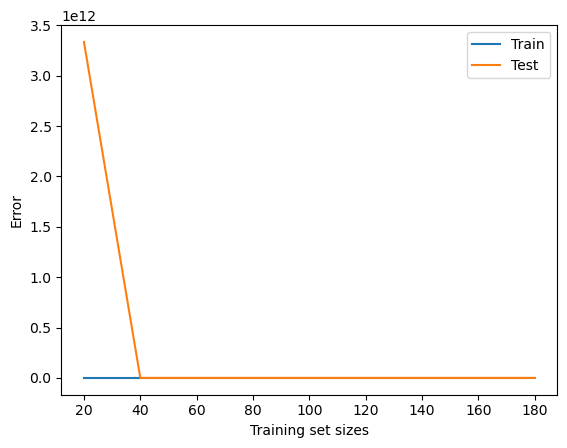

In [59]:
training_set_sizes = [20, 40, 60, 80, 100, 120, 140, 160, 180]

train_errors = [] #initialize arrays 
test_errors = []

for i in training_set_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-i/len(x), random_state=42) #create local train/test split 
    c = np.polyfit(x_train, y_train, 20) #manually select degree = 20 here 
    model = np.poly1d(c) #same as before 
    y_trainp = model(x_train)
    y_testp = model(x_test)
    train_errors.append(mean_squared_error(y_train, y_trainp))
    test_errors.append(mean_squared_error(y_test, y_testp))

plt.plot(training_set_sizes, train_errors, label='Train')
plt.plot(training_set_sizes, test_errors, label='Test')
plt.legend()
plt.xlabel('Training set sizes')
plt.ylabel('Error')
plt.show()

## Exercise 2 (HW4/2)

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Train a neural network suitable for character recognition on the MNIST data set! Feel free to modify the notebook we used in class. Change a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.). <span style="color:red"> Describe which model parameters you changed, and what effect they had on the performance of the model.</span> <br>(Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab or you can also use Google Colab to solve this problem. You can use a fast GPU on Colab for free!).

**b)** Use the model to try to recognize your own hand-written characters! To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class. <span style="color:red">Does the model recognize your handwriting? </span>